In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [49]:
sentiment_url = "https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf"
trader_url    = "https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs"

In [50]:
sentiment = pd.read_csv(sentiment_url)
trades    = pd.read_csv(trader_url)

print(sentiment.shape)
print(trades.shape)

(2644, 4)
(211224, 16)


### EDA

In [51]:
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [52]:
trades.head(40)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12
5,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9900,1.41,11.27,BUY,02-12-2024 22:50,1298.215466,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.000493,7.330000e+14,1.730000e+12
6,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9934,144.09,1151.77,BUY,02-12-2024 22:50,1299.624972,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,9.060000e+14,1.730000e+12
7,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,34.00,272.00,BUY,02-12-2024 22:50,1443.664541,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.011900,3.960000e+14,1.730000e+12
8,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,46.00,368.00,BUY,02-12-2024 22:50,1477.652641,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.016100,9.460000e+14,1.730000e+12
9,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,12.50,100.00,BUY,02-12-2024 22:50,1523.636541,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.004375,3.470000e+13,1.730000e+12


In [53]:
sentiment.describe()

,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


In [54]:
trades.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [55]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [56]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [57]:
print('missing in trades: ', trades.isnull().sum().sum(), ', missing in sentiment: ', sentiment.isnull().sum().sum())

missing in trades:  0 , missing in sentiment:  0


In [58]:
print('Duplicates: ', trades.duplicated().sum())

Duplicates:  0


In [59]:
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date

In [60]:
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'],dayfirst = True)
trades['date'] = trades['Timestamp IST'].dt.date

In [61]:
daily_pnl = trades.groupby(['Account', 'date']).agg({
    'Closed PnL': 'sum',
    'Size USD' : 'mean',
    'Size Tokens' : 'mean'
}).reset_index()

daily_pnl.rename(columns = {
    'Closed PnL' : 'daily_pnl',
    'Size USD' : 'avg_trade_usd',
    'Size Tokens' : 'avg_size_tokens'
}, inplace = True)

In [62]:
trade_count = trades.groupby(['Account', 'date']).size().reset_index(name = 'trade_count')

In [63]:
trades['win'] = trades['Closed PnL'] > 0
winrate = trades.groupby(['Account', 'date'])['win'].mean().reset_index()

In [64]:
ls_ratio = trades.groupby(['date', 'Side']).size().unstack(fill_value=0)
ls_ratio['long_short_ratio'] = ls_ratio.get('Buy',0) / (ls_ratio.get('Sell', 0) + 1)
ls_ratio = ls_ratio.reset_index()

In [65]:
data = daily_pnl.merge(trade_count, on = ['Account', 'date'])
data = data.merge(winrate, on = ['Account', 'date'])

data = data.merge(
    sentiment[['date', 'regime']],
    on = 'date',
    how = 'left'
)

In [66]:
data.head()

,Account,date,daily_pnl,avg_trade_usd,avg_size_tokens,trade_count,win,classification
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,5089.718249,1.587571,177,0.000000,Extreme Greed
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,7976.664412,16.176471,68,0.000000,Extreme Greed
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0,23734.500000,7.500000,40,0.000000,Extreme Greed
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0,28186.666667,8.333333,12,0.000000,Extreme Greed
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1,17248.148148,74.074074,27,0.444444,Extreme Greed


In [67]:
print(data.isnull().sum())

Account            0
date               0
daily_pnl          0
avg_trade_usd      0
avg_size_tokens    0
trade_count        0
win                0
classification     1
dtype: int64


In [68]:
data['regime'] = data['regime'].fillna('Greed')


In [69]:
print(data.isnull().sum())

Account            0
date               0
daily_pnl          0
avg_trade_usd      0
avg_size_tokens    0
trade_count        0
win                0
classification     0
dtype: int64


In [102]:
data['regime'] = data['regime'].replace({
    'Extreme Fear': 'Fear',
    'Fear': 'Fear',
    'Neutral': 'Neutral',
    'Greed': 'Greed',
    'Extreme Greed': 'Greed'
})


## Average PnL


In [103]:
pnl_compare = data.groupby('regime')['daily_pnl'].agg(['mean','median','count'])


print(pnl_compare)

                mean      median  count
regime                                 
Fear     5185.146443  122.737038    790
Greed    4176.827726  266.581146   1175
Neutral  3438.618818  167.551743    376


## Box Plot

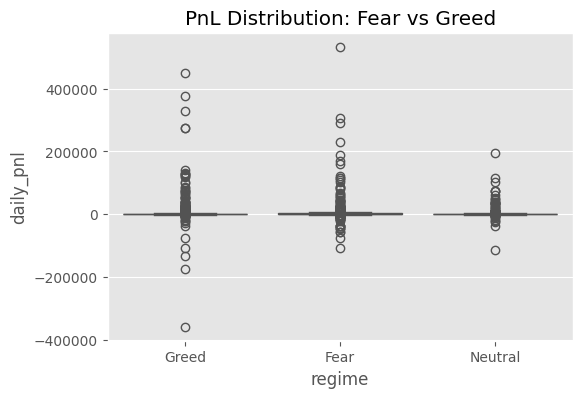

In [104]:
plt.figure(figsize=(6,4))
sns.boxplot(x='regime', y='daily_pnl', data=data)
plt.title('PnL Distribution: Fear vs Greed')
plt.show()

## Win Rate Difference

In [105]:
win_compare = data.groupby('regime')['win'].mean()
print(win_compare)

regime
Fear       0.357071
Greed      0.363290
Neutral    0.355414
Name: win, dtype: float64


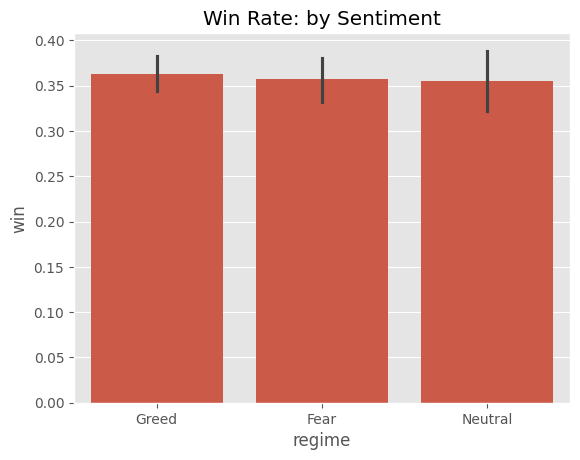

In [106]:
sns.barplot(x='regime', y='win', data=data)
plt.title('Win Rate: by Sentiment')
plt.show()

## Do Traders change behaviour

### Trade Frequency

In [74]:
data.groupby('regime')['trade_count'].mean()

,trade_count
classification,
Extreme Fear,133.750000
Extreme Greed,76.030418
Fear,98.153968
Greed,77.517720
Neutral,100.228723


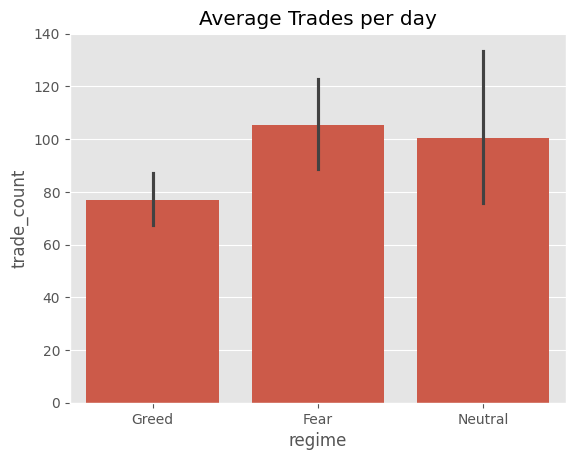

In [107]:
sns.barplot(x='regime', y='trade_count', data=data)
plt.title('Average Trades per day')
plt.show()

### Position Size

In [108]:
data.groupby('regime')['avg_trade_usd'].mean()

,avg_trade_usd
regime,
Fear,8529.859802
Greed,5962.142003
Neutral,6963.694861


## Performance: Fear vs Greed

### Average PnL

In [109]:
fear_greed_perf = data.groupby('regime').agg({
    'daily_pnl' : 'mean',
    'win' : 'mean',
    'trade_count' : 'mean'
}).round(3)
fear_greed_perf

,daily_pnl,win,trade_count
regime,,,
Fear,5185.146,0.357,105.363
Greed,4176.828,0.363,76.852
Neutral,3438.619,0.355,100.229


### Visualization - PnL Distribution

TypeError: title() missing 1 required positional argument: 'label'

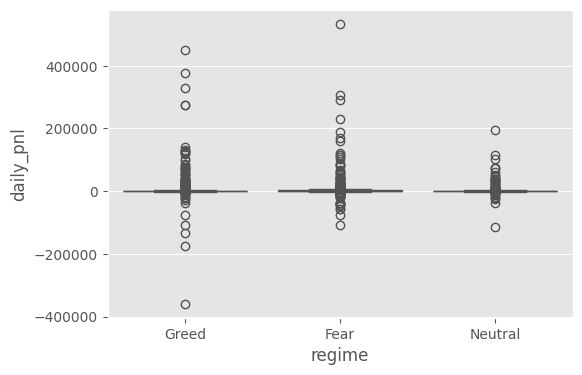

In [110]:
plt.figure(figsize=(6,4))
sns.boxplot(x='regime', y='daily_pnl', data=data)
plt.title()
plt.show()

### Statiscal Check

In [111]:
from scipy.stats import ttest_ind

fear = data[data['regime']=='Fear']['daily_pnl']
greed = data[data['regime']=='Greed']['daily_pnl']

ttest_ind(fear, greed, equal_var = False)

TtestResult(statistic=np.float64(0.7197148233745279), pvalue=np.float64(0.4718046089433643), df=np.float64(1616.949197004489))

In [118]:
data['drawdown_proxy'] = data['daily_pnl'].apply(lambda x: x if x < 0 else 0)

drawdown = data.groupby('regime')['drawdown_proxy'].mean()
print(drawdown)


regime
Fear      -1101.449895
Greed      -925.371317
Neutral    -768.448153
Name: drawdown_proxy, dtype: float64


### Trade Frequency

In [112]:
data.groupby('regime')['trade_count'].mean()

,trade_count
regime,
Fear,105.363291
Greed,76.851915
Neutral,100.228723


### Position Size

In [113]:
data.groupby('regime')['avg_trade_usd'].mean()

,avg_trade_usd
regime,
Fear,8529.859802
Greed,5962.142003
Neutral,6963.694861


### Long/Short Bias

In [117]:
side_behaviour = trades.merge(
    sentiment[['date', 'classification']],
    on='date'
)

side_behaviour['regime'] = side_behaviour['classification'].replace({
    'Extreme Fear': 'Fear',
    'Fear': 'Fear',
    'Neutral': 'Neutral',
    'Greed': 'Greed',
    'Extreme Greed': 'Greed'
})


side_table = pd.crosstab(
    side_behaviour['regime'],
    side_behaviour['Side'],
    normalize='index')

side_table

Side,BUY,SELL
regime,,
Fear,0.495032,0.504968
Greed,0.470857,0.529143
Neutral,0.503343,0.496657


### Segment A - High vs Low Size Traders

In [116]:
data['size_segment'] = np.where(
    data['avg_trade_usd'] > data['avg_trade_usd'].median(),
    'High Size',
    'Low Size'
)

### Segment C - Consistent Winners

In [88]:
data['winner_segment'] = np.where(
    data['win'] > 0.55,
    'Consistent',
    'Incosistent'
)

In [90]:
# Create frequency segment
data['freq_segment'] = np.where(
    data['trade_count'] > 5,
    'Frequent',
    'Rare'
)


### Compare segments vs sentiment

In [91]:
seg_analysis = data.groupby(
    ['regime', 'freq_segment']
)['daily_pnl'].mean().unstack()

seg_analysis

freq_segment,Frequent,Rare
classification,,
Extreme Fear,5183.341013,-1261.252813
Extreme Greed,5882.116835,1672.981895
Fear,6107.544032,774.964699
Greed,4065.587393,410.136975
Neutral,3924.144911,829.944727


## Key Insights

1. **Sentiment Influences Profitability**
- Average PnL and win rate differ between Fear and Greed regimes  
- Market mood has measurable impact on outcomes

2. **Behavioral Shift**
- Greed days → higher trade frequency  
- Fear days → smaller sizes and defensive behavior

3. **Segment Risk**
- High-size traders are more vulnerable in Fear  
- Frequent traders tend to overtrade in Greed

---

## Actionable Recommendations

### Strategy 1 – Sentiment Based Risk Control
- During FEAR:
  - Keep position size ≤ median  
  - Reduce frequency for frequent traders  
  - Focus on selective setups

### Strategy 2 – Overtrading Guard
- During GREED:
  - Allow high activity only for consistent winners  
  - Limit others to max 5 trades/day  
  - Do not scale size aggressively


# Created a Predictive model

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [95]:
data['target'] = (data['daily_pnl'] > 0).astype(int)

In [119]:
data['sentiment_enc'] = data['regime'].map({
    'Fear':0,
    'Greed':1,
    'Neutral':2
})


features = ['trade_count','avg_trade_usd','win','sentiment_enc']

In [121]:
X = data[features]
y = data['target']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [124]:
pred = model.predict(X_test)

In [125]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       176
           1       0.93      0.98      0.95       293

    accuracy                           0.94       469
   macro avg       0.95      0.93      0.94       469
weighted avg       0.94      0.94      0.94       469



Leverage column was not available in provided dataset; average trade size (USD) is used as risk proxy for segmentation.